# Notebook 1: Firing rates & spike statistics

Computational Biology 2 - WS 23/24

Notebooks are based on material created by Katharina Bracher.

---


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Problem 1: Important Terms and Definitions
Before working on the Notebook answer the following questions:

- What is an action potential? How is it generated? How can it be measured?
- What is a spike train?
- What are spike times?
- What is the spike count rate?
- What is meant by the term trial average, when measuring firing rates?
- What is a spiking probability?
- What is the difference between the time-dependent firing rate, the trial average firing rate and and the average firing rate?


### Problem 2: Our first Dataset - Electrophysiological Recordings

In [5]:
# Load the data from a file
data = np.load('./datasets/Data1.npz', allow_pickle=True)

In [6]:
# Here is a list of the dict keys
list(data.keys())

['V', 'dt', 'T', 'time', 'SpikeTimes']

***Promlem 3: Familiarize yourself with the data:***
- Extract the data from the dictionary to arrays.
- Describe the data contained in the dataset. 
- What was measured and how? Visualize the recording.
- What was the recording time and at which temporal resolution was measured?
- How many spikes were encountered?

In [17]:
v = data['V']  # membrane voltage in mV
spike_times = data['SpikeTimes']  # time points of spikes
dt = data['dt'][0]  # temporal resolution
t_max = data['T'][0]  # number of time steps in data set
time = data['time']  # time steps in ms

In [18]:
# time in ms, with step size dt=0.1ms
time

array([0.0000e+00, 1.0000e-01, 2.0000e-01, ..., 4.9998e+03, 4.9999e+03,
       5.0000e+03])

In [19]:
print('Temporal resolution: dt = ',dt,'ms')
print('Recorgin time: T = ',t_max,'ms')

Temporal resolution: dt =  0.1 ms
Recorgin time: T =  5000 ms


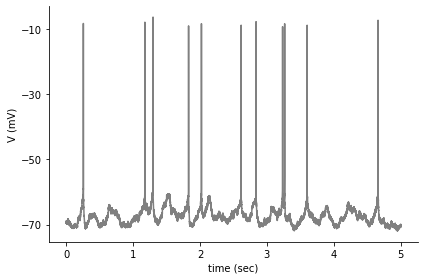

In [21]:
plt.plot(time/1000,v,color='gray')
plt.yticks([-70,-50,-30,-10])
plt.ylabel('V (mV)')
plt.xlabel('time (sec)')
sns.despine()
plt.tight_layout()

### Problem 3: Write Python-code

Find the time points of all spikes based on the voltage trace. 
Compare the results to the spike times in the dataset.

In [10]:
# SOLUTION
threshold = -30 # mV
# find time points where voltage trace crosses threshold
crossings = time[np.where(((v[:-1]-threshold)*(v[1:]-threshold)) < 0)]
# reshape, upward and downward crossing in one row
crossings = crossings.reshape(np.size(crossings)//2, 2)
# central point between upward and downward crossing
spike_times_2 = np.mean(crossings, axis=1)
spike_times, spike_times_2

(array([ 258.2, 1176.9, 1299. , 1829.6, 2021.7, 2614.7, 2837.5, 3233.6,
        3264.5, 3600.5, 4659.3]),
 array([ 258.4 , 1177.1 , 1299.15, 1829.7 , 2021.8 , 2614.9 , 2837.6 ,
        3233.7 , 3264.6 , 3600.7 , 4659.5 ]))

In [24]:
# alternative solution
# find time points at which action potentialss are initiated
spike_times_3 = []
for i in range(len(v)-1):
    if v[i] < threshold and v[i+1] > threshold:
        spike_times_3.append(i*dt)

print(spike_times_3)

[258.1, 1176.8, 1298.8000000000002, 1829.4, 2021.5, 2614.6000000000004, 2837.3, 3233.4, 3264.3, 3600.4, 4659.2]


### Problem 4: Histogram
Discretize the time and plot a histogram of the spike counts per bin ($\Delta t$ =500ms). Use `SpikeTimes` provided in the data. The NumPy function `histogram` might be useful. Alternatively use the hist() method from the pyplot module.

In a next step change the binsize to different values and plot the spike count. What happens for small time bins ($\Delta t$ =0.1ms)?

In [25]:
# Bin size and discretized time for computing counts
dt_rate=500 # 
spike_count_time=np.arange(0,t_max+1,dt_rate)

# Use histogram to compute counts
spike_counts=np.histogram(spike_times,spike_count_time)[0]

In [26]:
spike_counts

array([1, 0, 2, 1, 1, 2, 2, 1, 0, 1])

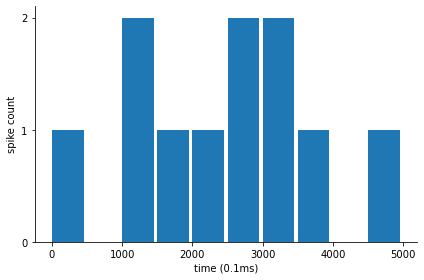

In [27]:
plt.bar(spike_count_time[:-1],spike_counts,width=.9*dt_rate,align='edge')
plt.xlabel('time (0.1ms)')
plt.ylabel('spike count')
plt.yticks([0,1,2])
sns.despine()
plt.tight_layout()

#### Binarized spike train.

In [28]:
binarized_spike_train=np.histogram(spike_times,time)[0]

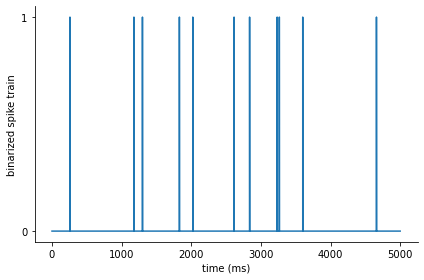

In [29]:
plt.plot((time[:-1]+time[1:])/2.,binarized_spike_train)
plt.xlabel('time (ms)')
plt.ylabel('binarized spike train')
plt.yticks([0,1])
sns.despine()
plt.tight_layout()

### Problem 5: Time dependent firing rate
Let us finally compute the binned firing rate. For computing the rate use the Spike Counts with $\Delta t$ = 500ms and plot the rate in Hz.

In [15]:
# Compute rate
rate = 1000 * spike_counts / dt_rate #factor 1000: 1/ms -> 1/s

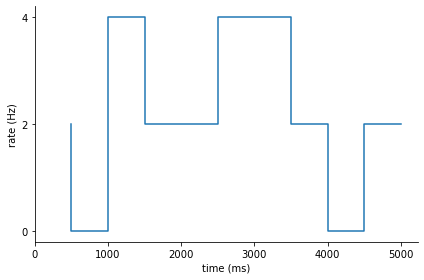

In [17]:
plt.step(spike_count_time[1:], rate)
plt.xlabel('time (ms)')
plt.ylabel('rate (Hz)')
plt.xlim(left=0)
plt.yticks([0,2,4])
sns.despine()
plt.tight_layout()

### Problem 6: Discussion
What about the firing rate in the window from 0 and 500 ms? And how to choose the "right" bin width?

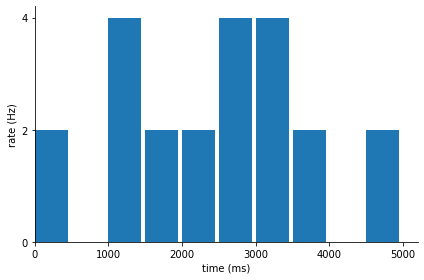

In [15]:
plt.bar(SpikeCountTime[:-1],Rate,width=.9*dtRate,align='edge')
plt.xlabel('time (ms)')
plt.ylabel('rate (Hz)')
plt.xlim(left=0)
plt.yticks([0,2,4])
sns.despine()
plt.tight_layout()

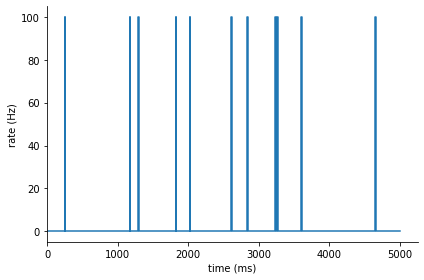

In [16]:
# too small dt, gives only 2 possible firing rate values.
dtRate=10 #ms
SpikeCountTime=np.arange(0,T+1,dtRate)
SpikeCounts=np.histogram(SpikeTimes,SpikeCountTime)[0]
Rate=1000*SpikeCounts/dtRate #factor 1000: 1/ms -> 1/s

plt.step(SpikeCountTime[1:], Rate)
plt.xlabel('time (ms)')
plt.ylabel('rate (Hz)')
plt.xlim(left=0)
#plt.yticks([0,2,4])
sns.despine()
plt.tight_layout()

__For s discussion read Theoretical Neuroscience (Dayan & Abbott) 1.2 Spike Trains and Firing Rates p.8-13__

Adapted from https://github.com/RobertRosenbaum/ModelingNeuralCircuits